# Via Freedom to coercion: the emergence of costly punishment

## Public Good Game with Prior Agreements

In a Public Good Game (PGG), players meet in groups of size $N$. 
They can choose whether to cooperate and contribute an amount, $c$, to the public good or to defect and take advantage of the public good without contributing to it.
The total contribution is multiplied by a factor, $r>1$, and the result is afterwards distributed equally among all players.
With r smaller than the group size ($r<N$), non-contributing free-riders always gain more than contributors.

Prior agreements can address the problem of the evolution of cooperation in the PGG. 
Before the PGG, commitment proposing players ask their co-players to commit to contribute to the PGG, paying a personal proposer’s cost to establish that agreement.
If all the requested co-players accept the commitment, the proposers assume that everyone will contribute to the public good. 
Those individuals who commit, yet later do not contribute, receive a penalty and are forced to compensate the proposers at a cost.

## Objective of the paper

To examine under which conditions avoidance, which is a generalization of the PD commitment behaviour towards the PGG, and restricting strategies are beneficial in the PGG, determining at the same time the conditions when the latter strategy is preferred over the former. 
The effect of the different parameters implicit to the strategies on their viability is carefully analysed. 
Interestingly, we will show that group size is an important factor in determining the conditions for which restriction may be better than simply avoiding non-committers.

## Required Libraries

Beside the usual Numpy and Matplolib, we use EGTTools! See more at https://egttools.readthedocs.io/en/latest/

In [217]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, List

In [218]:
from egttools.games import AbstractNPlayerGame
from egttools import sample_simplex, calculate_nb_states
from egttools.analytical import PairwiseComparison
from egttools.utils import calculate_stationary_distribution
from egttools.plotting import draw_invasion_diagram

In [219]:
class PGG(AbstractNPlayerGame):
    def __init__(self,
                 m: int, # size of the population
                 n: int, # number of participants in the PGG
                 c : float, # cost of cooperation
                 r : float, # enhancing factor
                 sigma : float, # fixed income
                 gamma: float, #  payoff of punishment
                 beta: float, # payoff reduction to defector
                ):
        AbstractNPlayerGame.__init__(self, 4, n)
        self.nb_strategies_ = 4
        self.group_size_ = n
        
        #save parameters
        self.strategies = ["N", "C", "P", "D"]  #non participant, cooperator, Punisher, defector
        self.c = c
        self.r = r
        self.sigma = sigma
        self.gamma = gamma
        self.beta = beta
        
        self.nb_group_configurations_ = self.nb_group_configurations()

        self.calculate_payoffs()
        

    def play(self, 
             group_composition: Union[List[int], np.ndarray], 
             game_payoffs: np.ndarray
            ) -> None:
        # iterate over the strategies in the group 
        game_payoffs[:] = 0.
        
        
        #print(group_composition)
        Nz, Nx, Nw, Ny = group_composition   #z NP, x C, w P, y D
        s = Nx + Ny + Nw

        if s > 1:
            common_pool = self.r * (Nx + Nw) * self.c / s
            for i in range(len(group_composition)):
                if (self.strategies[i] == "N"):
                    game_payoffs[i] = self.sigma
                elif (self.strategies[i] == "C"):
                    game_payoffs[i] = common_pool - self.c
                elif (self.strategies[i] == "P"):
                    game_payoffs[i] = common_pool - Ny * self.gamma - self.c
                elif (self.strategies[i] == "D"):
                    game_payoffs[i] = common_pool - Nw * self.beta
                else:
                    print("Invalid Strategy\t", self.strategies[i])
                if (group_composition[i] == 0):
                    game_payoffs[i] = 0
                    
        else:
            game_payoffs[:] = self.sigma


    def calculate_payoffs(self) -> np.ndarray:
        payoffs_container = np.zeros(shape=(self.nb_strategies_,), dtype=np.float64)
        for i in range(self.nb_group_configurations_):
            # Get group composition
            group_composition = sample_simplex(i, self.group_size_, self.nb_strategies_)
            group_composition = np.array(group_composition, dtype = float)
            #print(group_composition, group_composition[-2])
            self.play(group_composition, payoffs_container)
            
            for strategy_index, strategy_payoff in enumerate(payoffs_container):
                self.update_payoff(strategy_index, i, strategy_payoff)
                
            # Reinitialize payoff vector
            payoffs_container[:] = 0

        return self.payoffs()
    
    

In [220]:
# Parameters of the Evolutionary Dynamics: They are kept constant throughout the whole paper
m = 100
n = 5
r = 3
sigma = 1
gamma = 0.3
beta = 1
c = 1
mu = 0.001


In [221]:
strategy_labels = ["N", "C", "P", "D"]  #non participant, cooperator, Punisher, defector

In [222]:
game = PGG(m, n, c, r, sigma, gamma, beta)

In [223]:
# Payoffs:
group_size = n
nb_strategies = 4
nb_group_configurations = calculate_nb_states(group_size, nb_strategies)

payoffs = game.payoffs()


for j in range(nb_group_configurations):
    group_configuration = sample_simplex(index=j, pop_size=group_size, nb_strategies=nb_strategies)
    if group_configuration[:2].sum()>0 and (group_configuration>0).sum()<2.5: 
        print("payoffs of strategies "+str(strategy_labels)+" in group configuration "+str(group_configuration))
        print(np.round(payoffs[:,j], 3),'\n')

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [5 0 0 0]
[1. 1. 1. 1.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [4 1 0 0]
[1. 1. 1. 1.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [4 0 1 0]
[1. 1. 1. 1.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [4 0 0 1]
[1. 1. 1. 1.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [3 2 0 0]
[1. 2. 0. 0.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [3 0 2 0]
[1. 0. 2. 0.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [3 0 0 2]
[1. 0. 0. 0.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [2 3 0 0]
[1. 2. 0. 0.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [2 0 3 0]
[1. 0. 2. 0.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [2 0 0 3]
[1. 0. 0. 0.] 

payoffs of strategies ['N', 'C', 'P', 'D'] in group configuration [1 4 0 0]
[1. 

In [224]:
beta_Pairwise = 0.23
evolver = PairwiseComparison(m, game)
transition_matrix,fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta_Pairwise)
stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

sd_avoid = stationary_distribution[0]

### Figure 1A - Stationary distribution and fixation probabilities

The population spends most of the time in the homogeneous state of AVOID. 
The black arrows identify the advantageous transitions, where $\rho_N=1/Z$ denotes the neutral fixation probability. 
The dashed lines denote neutral transitions. 
Note the cyclic pattern from cooperation to defection to commitment strategies and back.

Note: in the following plot, an arrow from A to B means A is invaded by B

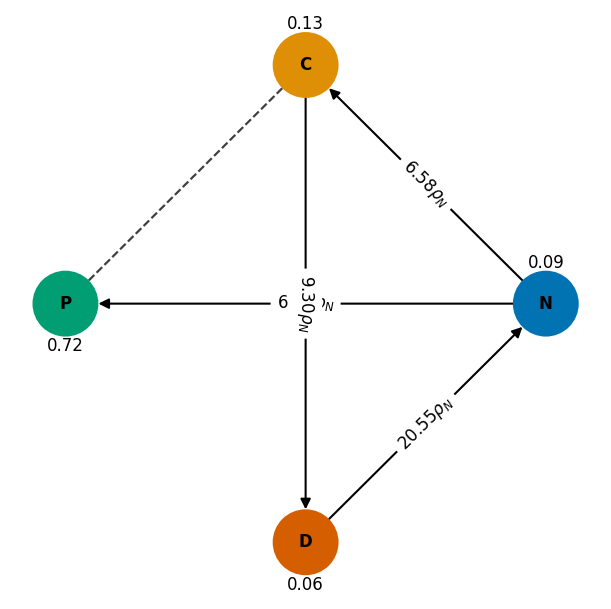

In [225]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = draw_invasion_diagram(strategy_labels,
                       1/m, 
                       fixation_probabilities,
                       stationary_distribution,
                       node_size=1000, 
                       font_size_node_labels=8,
                       font_size_edge_labels=8,
                       font_size_sd_labels=8,
                       edge_width=1,
                       min_strategy_frequency=-0.1, 
                       ax=ax)
plt.axis('off')
plt.show() # display

In [226]:
class PGG_mandatory(AbstractNPlayerGame):
    def __init__(self,
                 m: int, # size of the population
                 n: int, # number of participants in the PGG
                 c : float, # cost of cooperation
                 r : float, # enhancing factor
                 sigma : float, # fixed income
                 gamma: float, #  payoff of punishment
                 beta: float, # payoff reduction to defector
                ):
        AbstractNPlayerGame.__init__(self, 3, n)
        self.nb_strategies_ = 3
        self.group_size_ = n
        
        #save parameters
        self.strategies = ["C", "P", "D"] # cooperator, Punisher, defector
        self.c = c
        self.r = r
        self.sigma = sigma
        self.gamma = gamma
        self.beta = beta
        
        self.nb_group_configurations_ = self.nb_group_configurations()

        self.calculate_payoffs()
        print("gamma    ", gamma)
        print("beta     ", beta)
        

    def play(self, 
             group_composition: Union[List[int], np.ndarray], 
             game_payoffs: np.ndarray
            ) -> None:
        # iterate over the strategies in the group 
        game_payoffs[:] = 0.
        
        
        #print(group_composition)
        Nx, Nw, Ny = group_composition   #x C, w P, y D
        s = Nx + Ny + Nw

        if s > 1:
            common_pool = self.r * (Nx + Nw) * self.c / s
            for i in range(len(group_composition)):
                if (self.strategies[i] == "N"):
                    game_payoffs[i] = self.sigma
                elif (self.strategies[i] == "C"):
                    game_payoffs[i] = self.sigma + common_pool - self.c
                elif (self.strategies[i] == "P"):
                    game_payoffs[i] = self.sigma + common_pool - Ny * self.gamma - self.c
                elif (self.strategies[i] == "D"):
                    game_payoffs[i] = self.sigma + common_pool - Nw * self.beta
                else:
                    print("Invalid Strategy\t", self.strategies[i])
                if (group_composition[i] == 0):
                    game_payoffs[i] = 0
                    
        else:
            game_payoffs[:] = self.sigma
        
        print(group_composition, game_payoffs)


    def calculate_payoffs(self) -> np.ndarray:
        payoffs_container = np.zeros(shape=(self.nb_strategies_,), dtype=np.float64)
        for i in range(self.nb_group_configurations_):
            # Get group composition
            group_composition = sample_simplex(i, self.group_size_, self.nb_strategies_)
            group_composition = np.array(group_composition, dtype = float)
            #print(group_composition, group_composition[-2])
            self.play(group_composition, payoffs_container)
            
            for strategy_index, strategy_payoff in enumerate(payoffs_container):
                self.update_payoff(strategy_index, i, strategy_payoff)
                
            # Reinitialize payoff vector
            payoffs_container[:] = 0

        return self.payoffs()
    
    

In [227]:
game_2 = PGG_mandatory(m, n, c, r, sigma, gamma, beta)

[5. 0. 0.] [3. 0. 0.]
[4. 1. 0.] [3. 3. 0.]
[4. 0. 1.] [2.4 0.  3.4]
[3. 2. 0.] [3. 3. 0.]
[3. 1. 1.] [2.4 2.1 2.4]
[3. 0. 2.] [1.8 0.  2.8]
[2. 3. 0.] [3. 3. 0.]
[2. 2. 1.] [2.4 2.1 1.4]
[2. 1. 2.] [1.8 1.2 1.8]
[2. 0. 3.] [1.2 0.  2.2]
[1. 4. 0.] [3. 3. 0.]
[1. 3. 1.] [2.4 2.1 0.4]
[1. 2. 2.] [1.8 1.2 0.8]
[1. 1. 3.] [1.2 0.3 1.2]
[1. 0. 4.] [0.6 0.  1.6]
[0. 5. 0.] [0. 3. 0.]
[0. 4. 1.] [ 0.   2.1 -0.6]
[0. 3. 2.] [ 0.   1.2 -0.2]
[0. 2. 3.] [0.  0.3 0.2]
[0. 1. 4.] [ 0.  -0.6  0.6]
[0. 0. 5.] [0. 0. 1.]
gamma     0.3
beta      1


In [228]:
beta_Pairwise = 1
evolver = PairwiseComparison(m, game_2)
transition_matrix,fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta_Pairwise)
stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

sd_avoid = stationary_distribution[0]

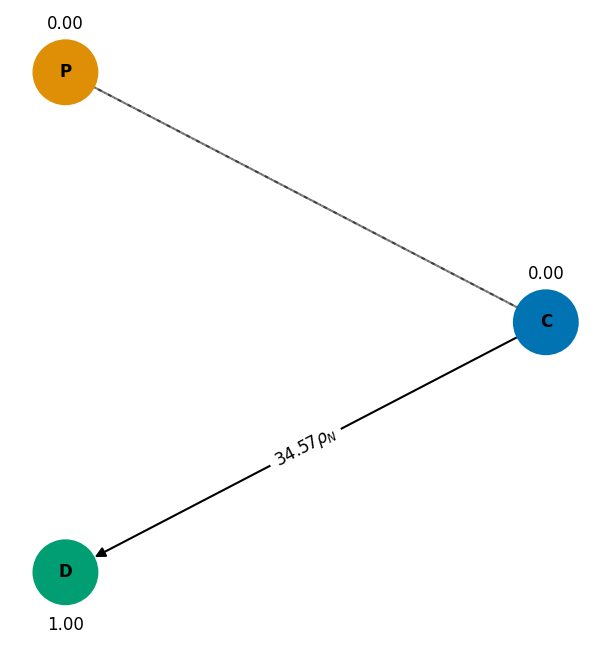

In [229]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = draw_invasion_diagram(game_2.strategies,
                       1/m, 
                       fixation_probabilities,
                       stationary_distribution,
                       node_size=1000, 
                       font_size_node_labels=8,
                       font_size_edge_labels=8,
                       font_size_sd_labels=8,
                       edge_width=1,
                       min_strategy_frequency=-0.1, 
                       ax=ax)
plt.axis('off')

plt.show() # display

# Fig3

In [230]:
class PGG_without_punishment(AbstractNPlayerGame):
    def __init__(self,
                 m: int, # size of the population
                 n: int, # number of participants in the PGG
                 c : float, # cost of cooperation
                 r : float, # enhancing factor
                 sigma : float, # fixed income
                 gamma: float, #  payoff of punishment
                 beta: float, # payoff reduction to defector
                ):
        AbstractNPlayerGame.__init__(self, 3, n)
        self.nb_strategies_ = 3
        self.group_size_ = n
        
        #save parameters
        self.strategies = ["N", "C", "D"]  #non participant, cooperator, defector
        self.c = c
        self.r = r
        self.sigma = sigma
        self.gamma = gamma
        self.beta = beta
        
        self.nb_group_configurations_ = self.nb_group_configurations()
        print(self.nb_group_configurations_)

        self.calculate_payoffs()
        

    def play(self, 
             group_composition: Union[List[int], np.ndarray], 
             game_payoffs: np.ndarray
            ) -> None:
        # iterate over the strategies in the group 
        game_payoffs[:] = 0.
        
        
        #print(group_composition)
        Nz, Nx, Ny = group_composition   #z NP, x C, w P, y D
        s = Nx + Ny

        if s > 1:
            common_pool = self.r * (Nx) * self.c / s
            for i in range(len(group_composition)):
                if (self.strategies[i] == "N"):
                    game_payoffs[i] = self.sigma
                elif (self.strategies[i] == "C"):
                    game_payoffs[i] = common_pool - self.c
                elif (self.strategies[i] == "D"):
                    game_payoffs[i] = common_pool
                else:
                    print("Invalid Strategy\t", self.strategies[i])
                if (group_composition[i] == 0):
                    game_payoffs[i] = 0
                    
        else:
            game_payoffs[:] = self.sigma
        
        print(group_composition, game_payoffs)


    def calculate_payoffs(self) -> np.ndarray:
        payoffs_container = np.zeros(shape=(self.nb_strategies_,), dtype=np.float64)
        for i in range(self.nb_group_configurations_):
            # Get group composition
            group_composition = sample_simplex(i, self.group_size_, self.nb_strategies_)
            group_composition = np.array(group_composition, dtype = float)
            #print(group_composition, group_composition[-2])
            self.play(group_composition, payoffs_container)
            
            for strategy_index, strategy_payoff in enumerate(payoffs_container):
                self.update_payoff(strategy_index, i, strategy_payoff)
                
            # Reinitialize payoff vector
            payoffs_container[:] = 0

        return self.payoffs()
    
    

In [231]:
game_3_1 = PGG_without_punishment(m, n, c, r, sigma, gamma, beta)

21
[5. 0. 0.] [1. 1. 1.]
[4. 1. 0.] [1. 1. 1.]
[4. 0. 1.] [1. 1. 1.]
[3. 2. 0.] [1. 2. 0.]
[3. 1. 1.] [1.  0.5 1.5]
[3. 0. 2.] [1. 0. 0.]
[2. 3. 0.] [1. 2. 0.]
[2. 2. 1.] [1. 1. 2.]
[2. 1. 2.] [1. 0. 1.]
[2. 0. 3.] [1. 0. 0.]
[1. 4. 0.] [1. 2. 0.]
[1. 3. 1.] [1.   1.25 2.25]
[1. 2. 2.] [1.  0.5 1.5]
[1. 1. 3.] [ 1.   -0.25  0.75]
[1. 0. 4.] [1. 0. 0.]
[0. 5. 0.] [0. 2. 0.]
[0. 4. 1.] [0.  1.4 2.4]
[0. 3. 2.] [0.  0.8 1.8]
[0. 2. 3.] [0.  0.2 1.2]
[0. 1. 4.] [ 0.  -0.4  0.6]
[0. 0. 5.] [0. 0. 0.]


In [232]:
beta_Pairwise = 1
evolver = PairwiseComparison(m, game_3_1)
transition_matrix,fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta_Pairwise)
stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

sd_avoid = stationary_distribution[0]

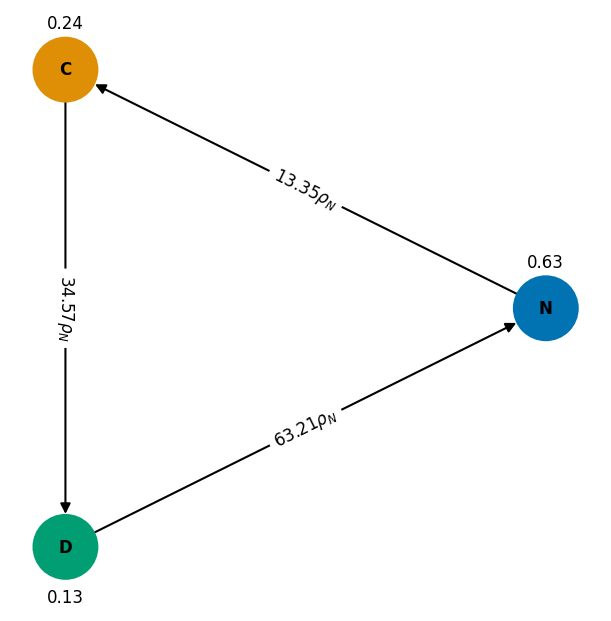

In [233]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = draw_invasion_diagram(game_3_1.strategies,
                       1/m, 
                       fixation_probabilities,
                       stationary_distribution,
                       node_size=1000, 
                       font_size_node_labels=8,
                       font_size_edge_labels=8,
                       font_size_sd_labels=8,
                       edge_width=1,
                       min_strategy_frequency=-0.1, 
                       ax=ax)
plt.axis('off')

plt.show() # display

## fig 3b

In [234]:
class PGG_punish_N(AbstractNPlayerGame):
    def __init__(self,
                 m: int, # size of the population
                 n: int, # number of participants in the PGG
                 c : float, # cost of cooperation
                 r : float, # enhancing factor
                 sigma : float, # fixed income
                 gamma: float, #  payoff of punishment
                 beta: float, # payoff reduction to defector
                 delta: float, # reduction punish Non participants
                ):
        AbstractNPlayerGame.__init__(self, 4, n)
        self.nb_strategies_ = 4
        self.group_size_ = n
        
        #save parameters
        self.strategies = ["N", "C", "P", "D"]  #non participant, cooperator, defector
        self.c = c
        self.r = r
        self.sigma = sigma
        self.gamma = gamma
        self.beta = beta
        self.delta = delta

        self.nb_group_configurations_ = self.nb_group_configurations()

        self.calculate_payoffs()
        

    def play(self, 
             group_composition: Union[List[int], np.ndarray], 
             game_payoffs: np.ndarray
            ) -> None:
        # iterate over the strategies in the group 
        game_payoffs[:] = 0.
        
        
        #print(group_composition)
        Nz, Nx, Nw, Ny = group_composition   #z NP, x C, w P, y D
        s = Nx + Ny + Nw

        if s > 1:
            common_pool = self.r * (Nx + Nw) * self.c / s
            for i in range(len(group_composition)):
                if (self.strategies[i] == "N"):
                    game_payoffs[i] = self.sigma- Nw * self.delta *self.gamma
                elif (self.strategies[i] == "C"):
                    game_payoffs[i] = common_pool - self.c 
                elif (self.strategies[i] == "P"):
                    game_payoffs[i] = common_pool - Ny * self.gamma - Nz * self.delta * self.gamma - self.c
                elif (self.strategies[i] == "D"):
                    game_payoffs[i] = common_pool - Nw * self.beta
                else:
                    print("Invalid Strategy\t", self.strategies[i])
                if (group_composition[i] == 0):
                    game_payoffs[i] = 0
                    
        else:
            game_payoffs[:] = self.sigma


    def calculate_payoffs(self) -> np.ndarray:
        payoffs_container = np.zeros(shape=(self.nb_strategies_,), dtype=np.float64)
        for i in range(self.nb_group_configurations_):
            # Get group composition
            group_composition = sample_simplex(i, self.group_size_, self.nb_strategies_)
            group_composition = np.array(group_composition, dtype = float)
            #print(group_composition, group_composition[-2])
            self.play(group_composition, payoffs_container)
            
            for strategy_index, strategy_payoff in enumerate(payoffs_container):
                self.update_payoff(strategy_index, i, strategy_payoff)
                
            # Reinitialize payoff vector
            payoffs_container[:] = 0

        return self.payoffs()
    
    

In [235]:
game_3_2 = PGG_punish_N(m, n,c,r,sigma, gamma, beta, 1)

In [236]:
beta_Pairwise = 1
evolver = PairwiseComparison(m, game_3_2)
transition_matrix,fixation_probabilities = evolver.calculate_transition_and_fixation_matrix_sml(beta_Pairwise)
stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

sd_avoid = stationary_distribution[0]

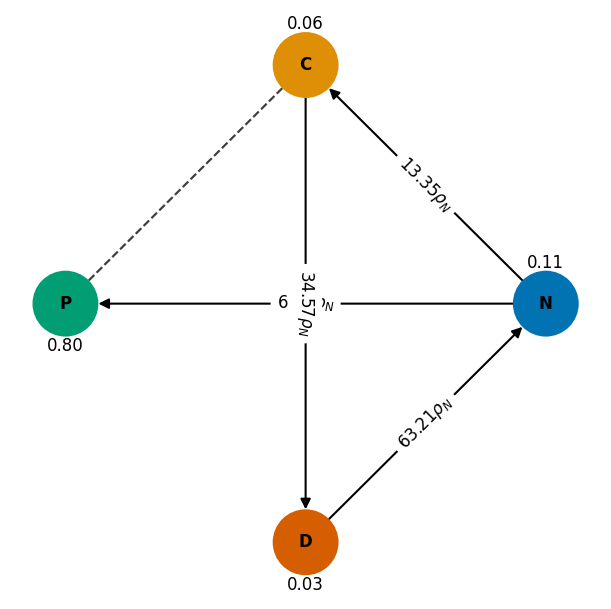

In [237]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
G = draw_invasion_diagram(game_3_2.strategies,
                       1/m, 
                       fixation_probabilities,
                       stationary_distribution,
                       node_size=1000, 
                       font_size_node_labels=8,
                       font_size_edge_labels=8,
                       font_size_sd_labels=8,
                       edge_width=1,
                       min_strategy_frequency=-0.1, 
                       ax=ax)
plt.axis('off')

plt.show() # display

## Fig1.a

In [238]:
nb_points = 7
nb_strategies = 4

s_values = np.ones(nb_points)
mult = 0.00001
for i in range(len(s_values)):
    s_values[i] = mult
    mult *= 10

frequency = np.zeros((nb_points, nb_strategies), dtype = float)

for i, s in enumerate(s_values):

    game = PGG(m, n, c,r,sigma, gamma, beta)
    evolver = PairwiseComparison(m, game)
    transition_matrix,_ = evolver.calculate_transition_and_fixation_matrix_sml(s)
    stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

    frequency[i,:] = stationary_distribution

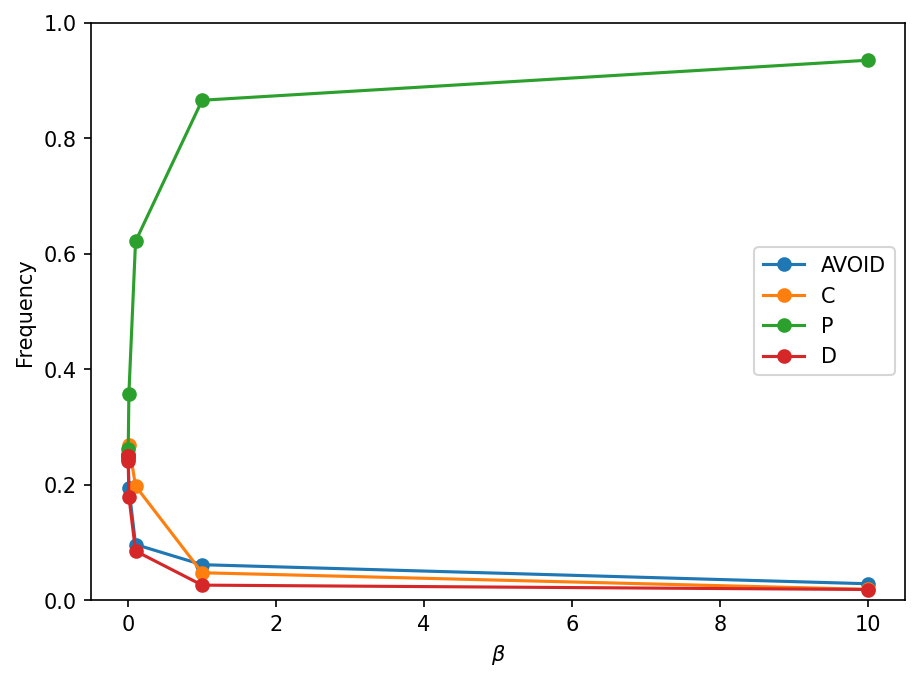

In [239]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.plot(s_values, frequency, marker='o')
ax.legend(["AVOID"]+strategy_labels[1:])
ax.set_ylim(0., 1.)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Frequency')

plt.show()

## Fig1.b

In [240]:
nb_points = 7
nb_strategies = 4
m= 1000

s_values = np.ones(nb_points)
mult = 0.00001
for i in range(len(s_values)):
    s_values[i] = mult
    mult *= 10

frequency = np.zeros((nb_points, nb_strategies), dtype = float)

for i, s in enumerate(s_values):

    game = PGG(m, n, c,r,sigma, gamma, beta)
    evolver = PairwiseComparison(m, game)
    transition_matrix,_ = evolver.calculate_transition_and_fixation_matrix_sml(s)
    stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

    frequency[i,:] = stationary_distribution

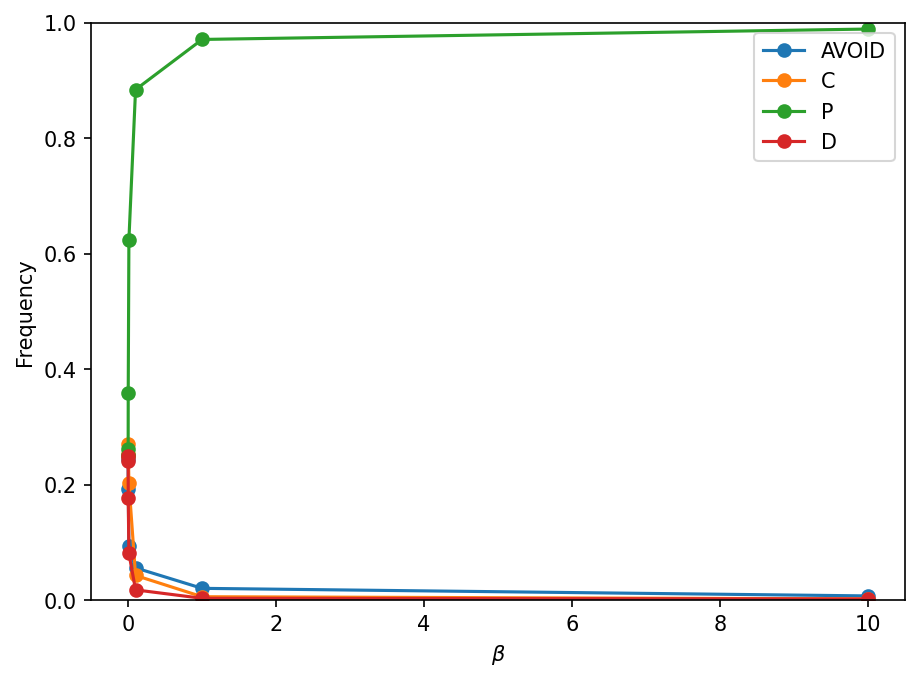

In [241]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.plot(s_values, frequency, marker='o')
ax.legend(["AVOID"]+strategy_labels[1:])
ax.set_ylim(0., 1.)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Frequency')

plt.show()

## fig 1.c

In [247]:
nb_points = 7
nb_strategies = 4
m = 100
n = 5
r = 3
sigma = 1
gamma = 0.3
beta = 1

s_values = np.ones(nb_points)
mult = 0.00001
for i in range(len(s_values)):
    s_values[i] = mult
    mult *= 10

frequency = np.zeros((nb_points, nb_strategies), dtype = float)

for i, s in enumerate(s_values):

    game = PGG_punish_N(m, n, c,r,sigma, gamma, beta, delta=1)
    evolver = PairwiseComparison(m, game)
    transition_matrix,_ = evolver.calculate_transition_and_fixation_matrix_sml(s)
    stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

    frequency[i,:] = stationary_distribution

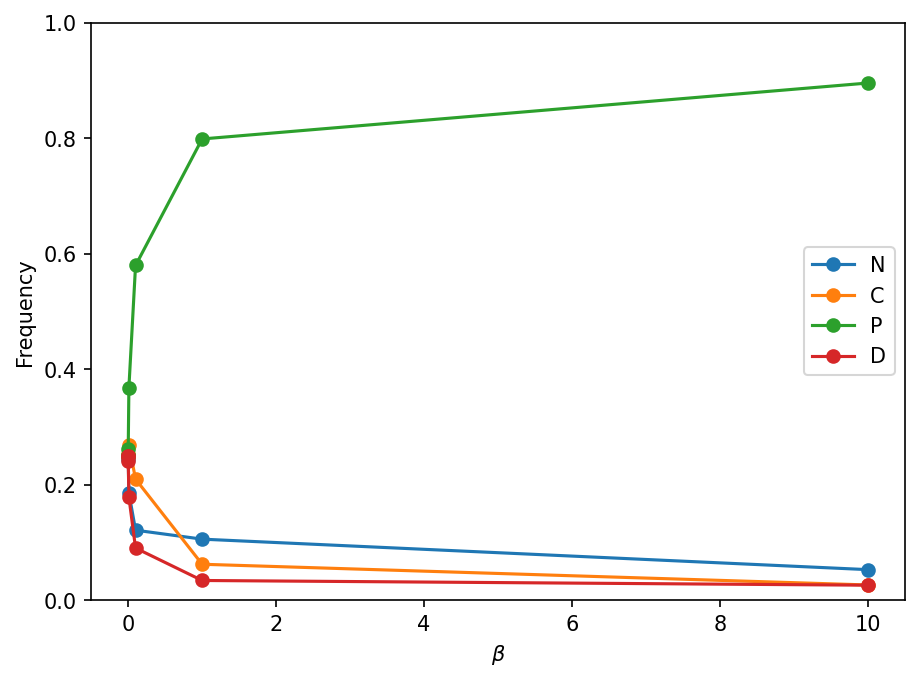

In [248]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.plot(s_values, frequency, marker='o')
ax.legend(strategy_labels)
ax.set_ylim(0., 1.)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Frequency')

plt.show()

## Fig 1.d

In [ ]:
nb_points = 7
nb_strategies = 4
m = 100
r = 1.8
n = 5
sigma = 1
gamma = 0.3
beta = 1

s_values = np.ones(nb_points)
mult = 0.00001
for i in range(len(s_values)):
    s_values[i] = mult
    mult *= 10

frequency = np.zeros((nb_points, nb_strategies), dtype = float)

for i, s in enumerate(s_values):

    game = PGG_punish_N(m, n, c, r,sigma, gamma, beta, delta=0.1)
    evolver = PairwiseComparison(m, game)
    transition_matrix,_ = evolver.calculate_transition_and_fixation_matrix_sml(s)
    stationary_distribution = calculate_stationary_distribution(transition_matrix.transpose())

    frequency[i,:] = stationary_distribution

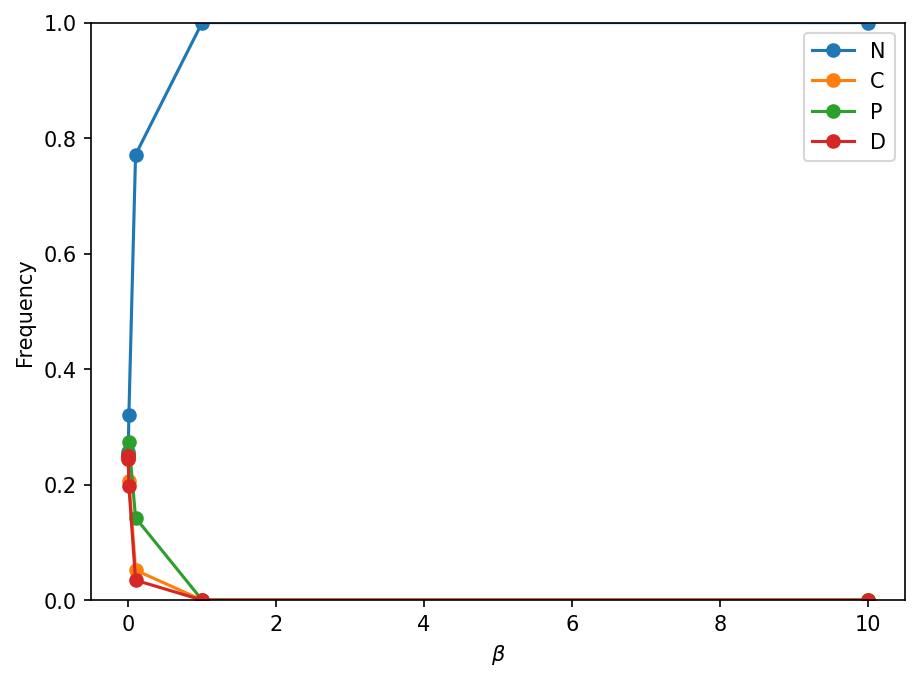

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), dpi=150)
ax.plot(s_values, frequency, marker='o')
ax.legend(strategy_labels)
ax.set_ylim(0., 1.)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Frequency')
ax.set_xsclae('log')

plt.show()